In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# features/ csv -> dataframe
feat_cancer_raw = pd.read_csv("csv/feat_cancer.csv")
df_cancer = pd.DataFrame(feat_cancer_raw)
feat_old_raw = pd.read_csv("csv/feat_old.csv")
df_old = pd.DataFrame(feat_old_raw)
feat_cyc_raw = pd.read_csv("csv/feat_cyc.csv")
df_cyc = pd.DataFrame(feat_cyc_raw)
feat_ment_raw = pd.read_csv("csv/feat_ment.csv")
df_ment = pd.DataFrame(feat_ment_raw)

# target/ csv -> dataframe
target_death_raw = pd.read_csv("csv/target_death.csv")
df_death = pd.DataFrame(target_death_raw)

# 'ADD_UP'이 포함된 데이터 제거
df_death = df_death[~df_death['AREA'].str.contains('ADD_UP', na=False)]

# 고유한 지역 리스트 추출
areas = df_death['AREA'].unique()

# feature dict / target dict
features_dict = {}
target_dict = {}

# 각 지역별 feature와 target 데이터 생성
for area in areas:
    area_target = df_death[df_death['AREA'] == area].drop(columns='AREA').transpose()
    area_target.columns = ['TARGET']

    # 각 feature 데이터 생성
    area_feat_cancer = df_cancer[df_cancer['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_cancer.columns = ['CANCER']
    
    area_feat_old = df_old[df_old['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_old.columns = ['OLD']
    
    area_feat_cyc = df_cyc[df_cyc['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_cyc.columns = ['CYCLIC']
    
    area_feat_ment = df_ment[df_ment['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_ment.columns = ['MENTAL']

    # 지역별 feature 데이터 결합
    area_features = pd.concat([area_feat_cancer, area_feat_old, area_feat_cyc, area_feat_ment], axis=1)

    # 'ADD_UP'이 포함된 features 데이터 제거
    area_features = area_features[~area_features.index.str.contains('ADD_UP', na=False)]

    # dictionary에 feature와 target 저장
    features_dict[area] = area_features
    target_dict[area] = area_target


SEOUL 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -0.462150
1  0.005623        -2.051998
2  0.031623        -2.769076
3  0.177828        -3.252800
4  1.000000        -2.731861


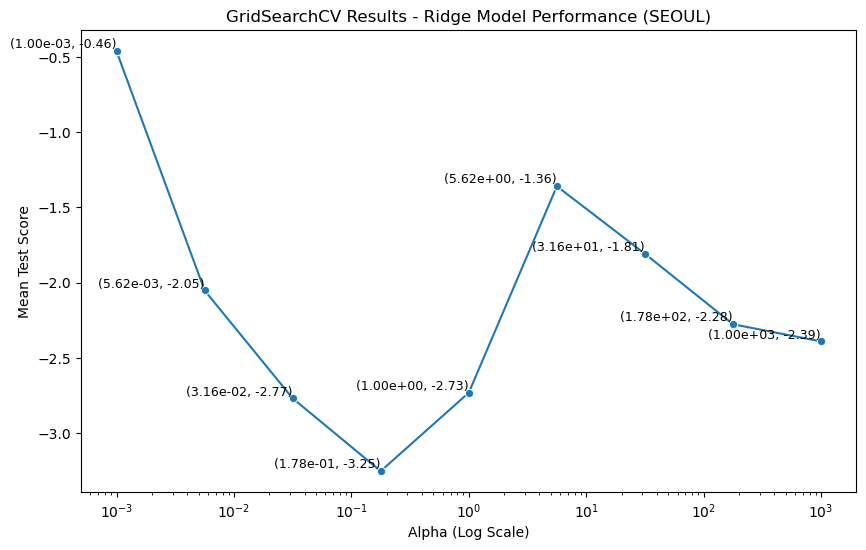


BUSAN 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -8.943944
1  0.005623        -3.700863
2  0.031623        -0.415564
3  0.177828         0.417737
4  1.000000         0.610479


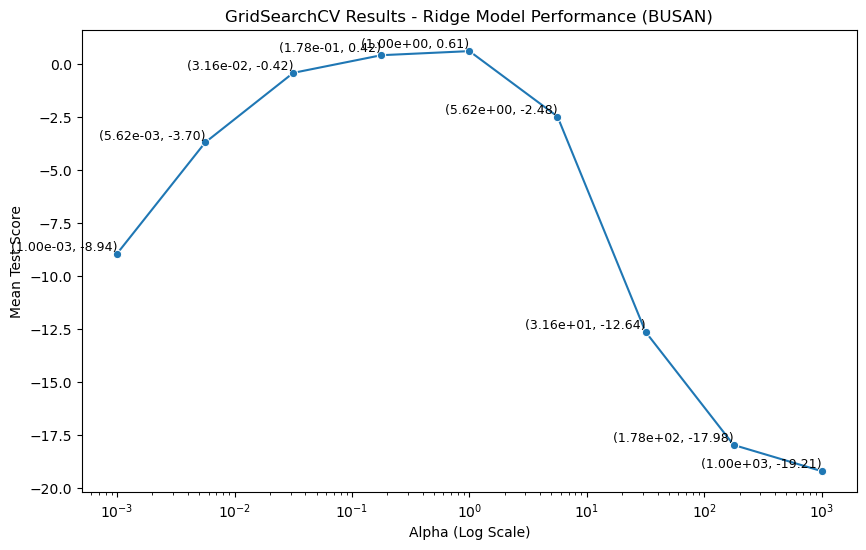


DAEGU 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -1.816973
1  0.005623        -0.823427
2  0.031623        -0.379899
3  0.177828        -1.836924
4  1.000000        -2.682571


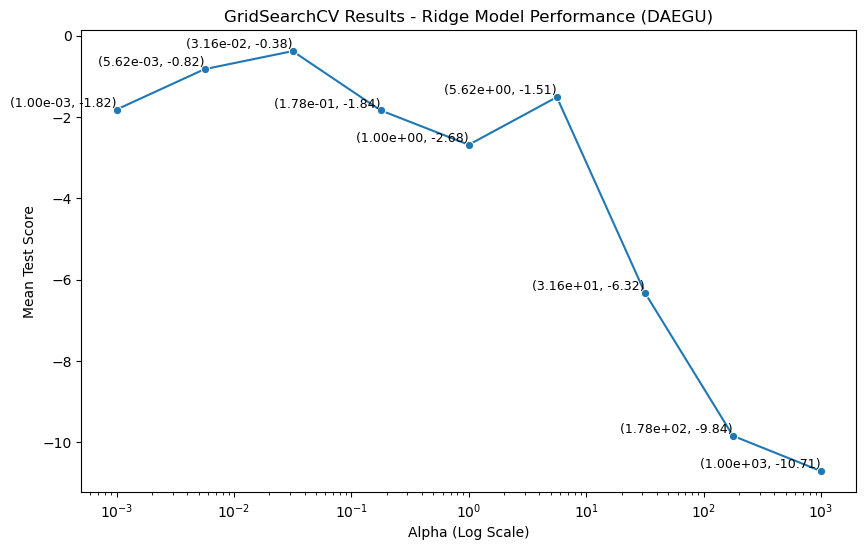


INCHEON 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.874744
1  0.005623         0.898684
2  0.031623         0.895660
3  0.177828         0.893579
4  1.000000         0.778045


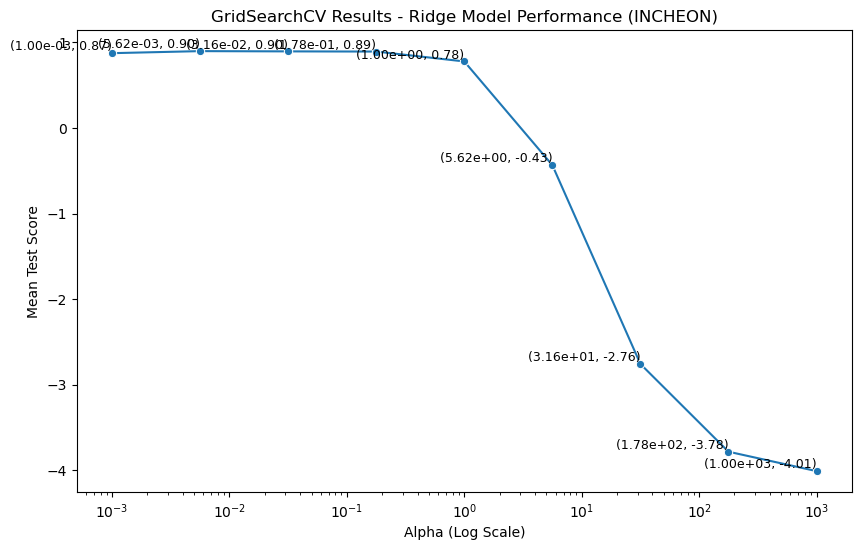


GWANGJU 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -0.483478
1  0.005623        -0.204923
2  0.031623        -0.139242
3  0.177828        -0.510763
4  1.000000        -1.047457


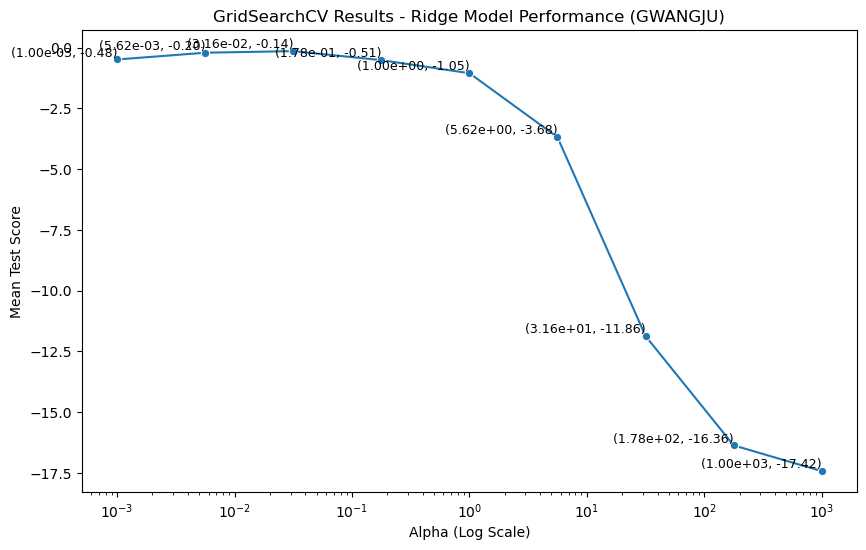


DAEJEON 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.641371
1  0.005623         0.711923
2  0.031623         0.737316
3  0.177828         0.785189
4  1.000000         0.847720


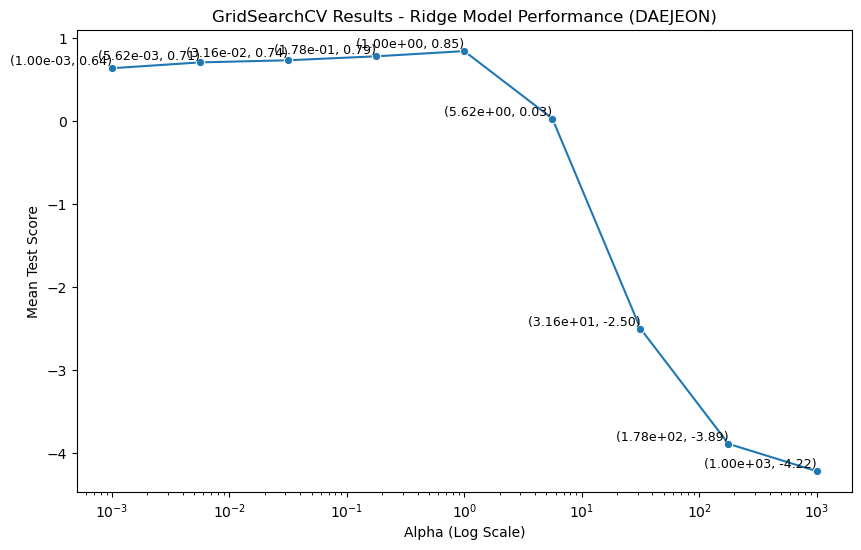


ULSAN 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.721710
1  0.005623         0.601477
2  0.031623         0.625988
3  0.177828         0.534123
4  1.000000         0.475757


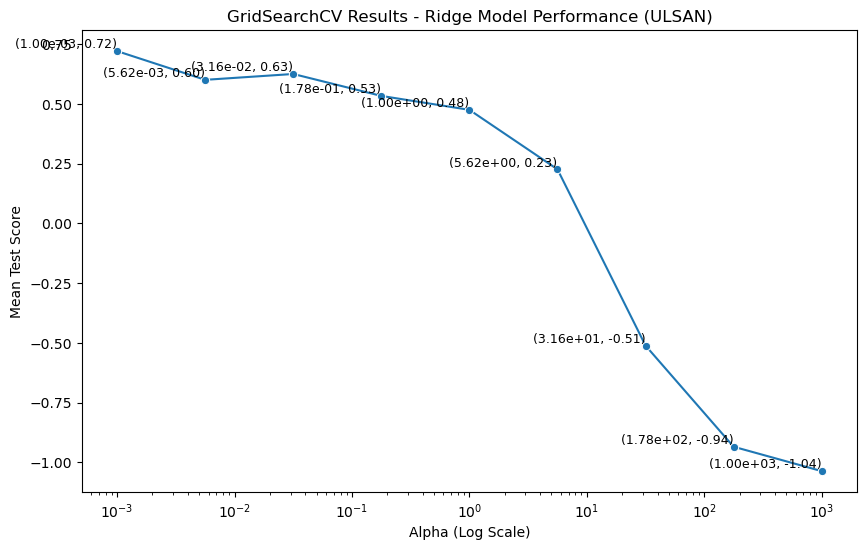


SEJONG 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.750377
1  0.005623         0.747045
2  0.031623         0.579782
3  0.177828         0.160215
4  1.000000        -0.372341


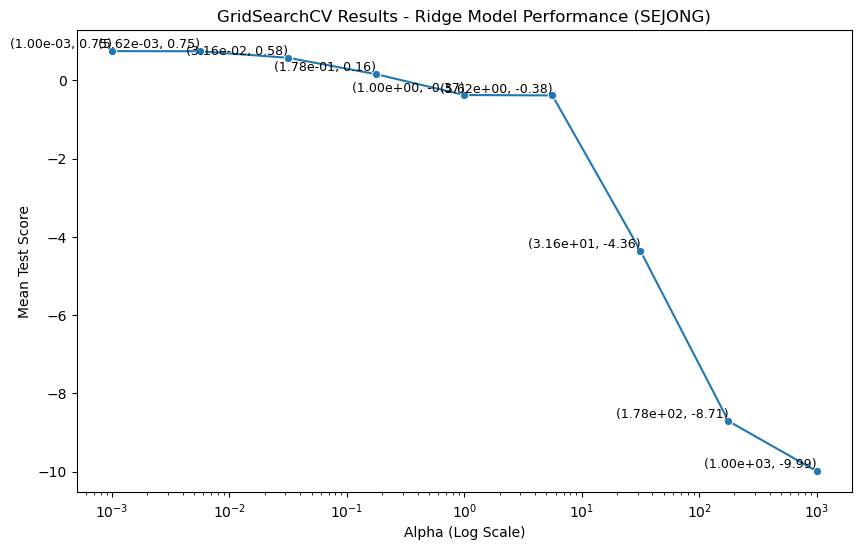


GYEONGGI 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.875536
1  0.005623         0.950650
2  0.031623         0.909494
3  0.177828         0.905486
4  1.000000         0.905133


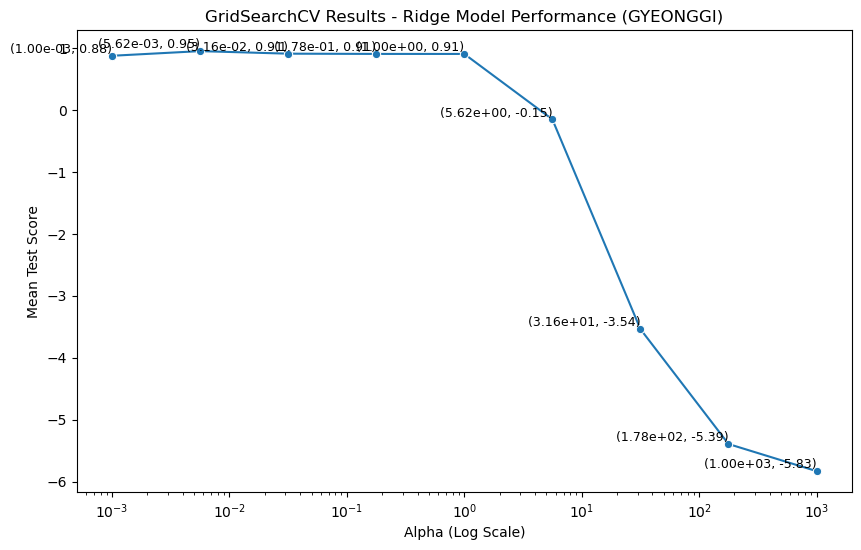


GANGWON 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000       -25.733123
1  0.005623       -25.289007
2  0.031623       -25.484859
3  0.177828       -26.318605
4  1.000000       -57.776599


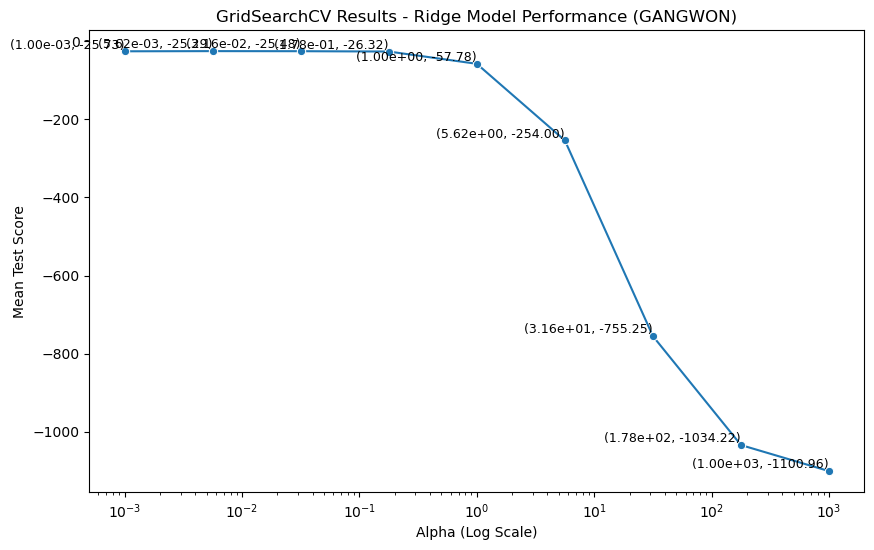


CHUNGBUK 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.041067
1  0.005623         0.241448
2  0.031623         0.365878
3  0.177828         0.539948
4  1.000000         0.548332


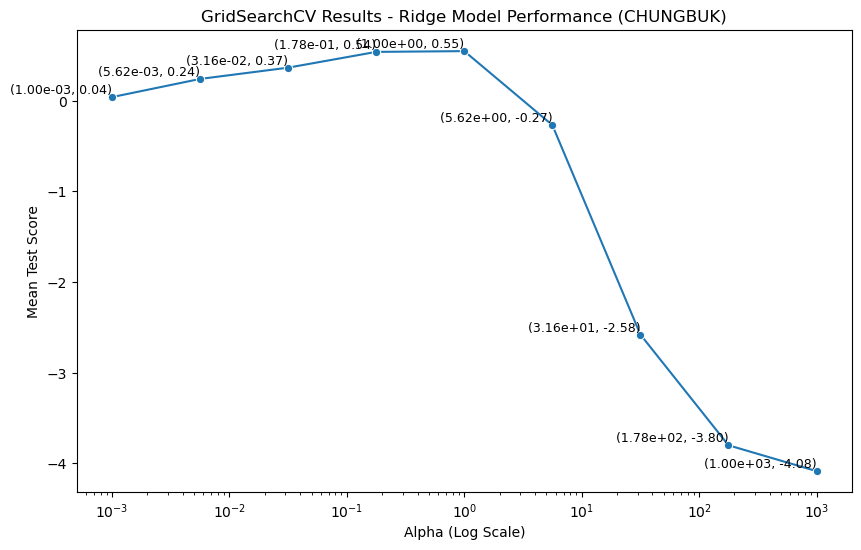


CHUNGNAM 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.316967
1  0.005623        -0.035824
2  0.031623         0.306741
3  0.177828        -0.098590
4  1.000000        -3.396790


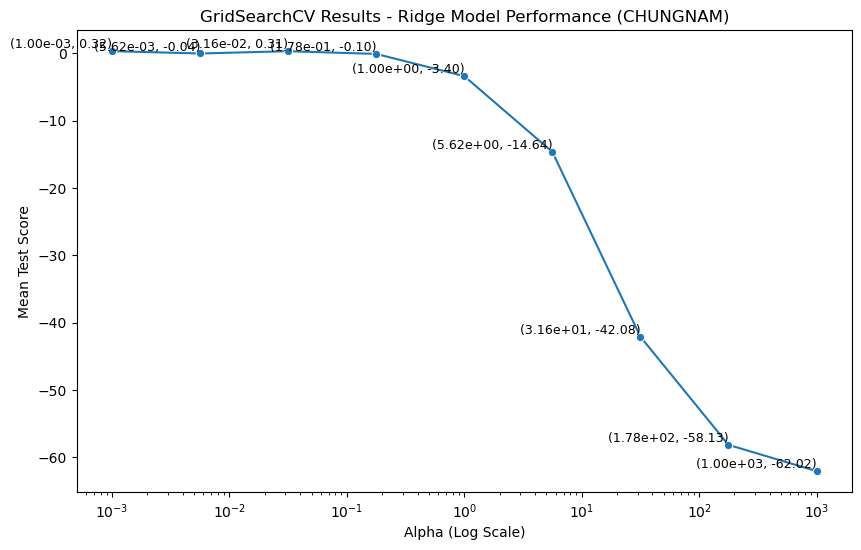


JEONBUK 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -1.298405
1  0.005623         0.508747
2  0.031623         0.516278
3  0.177828         0.524268
4  1.000000         0.462562


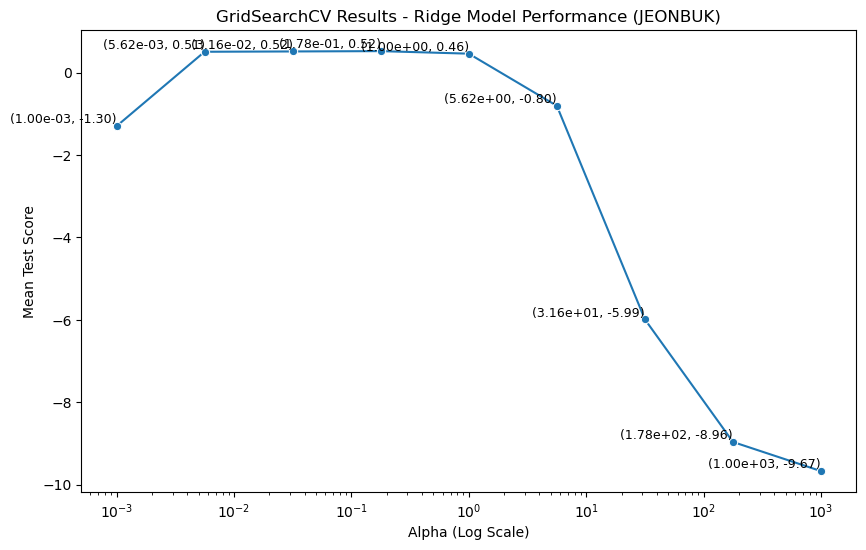


JEONNAM 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -7.674774
1  0.005623       -35.525644
2  0.031623       -42.012347
3  0.177828       -32.015607
4  1.000000       -29.152702


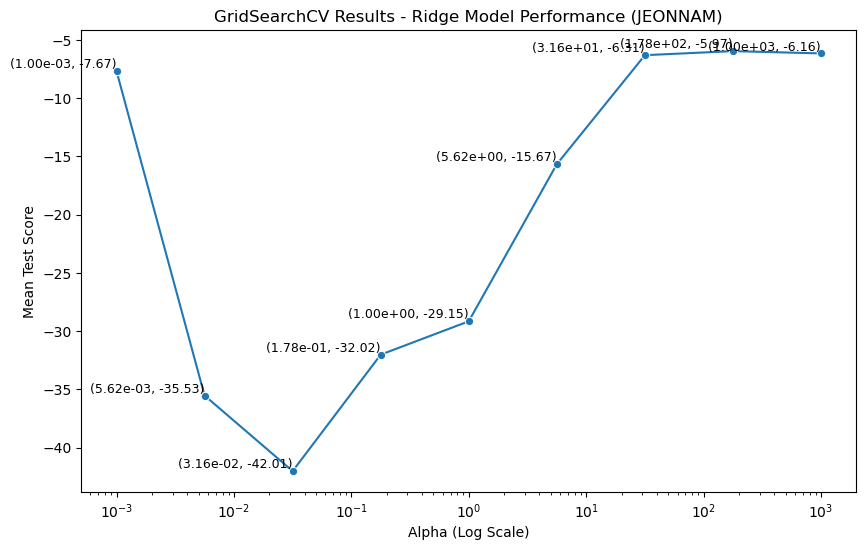


GYEONGBUK 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000      -206.305070
1  0.005623     -2200.922841
2  0.031623     -1770.409156
3  0.177828     -1607.163143
4  1.000000     -3190.301335


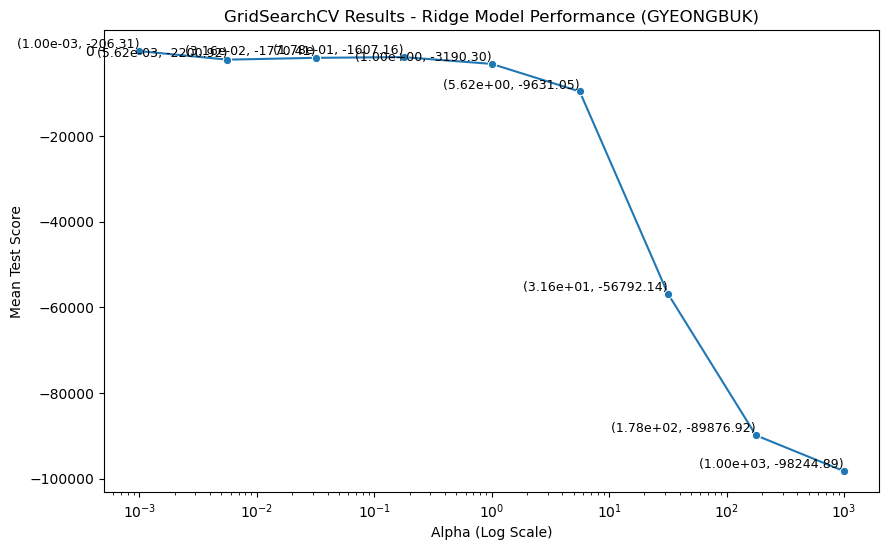


GYEONGNAM 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000        -2.132653
1  0.005623        -0.219007
2  0.031623         0.672173
3  0.177828         0.489807
4  1.000000         0.147257


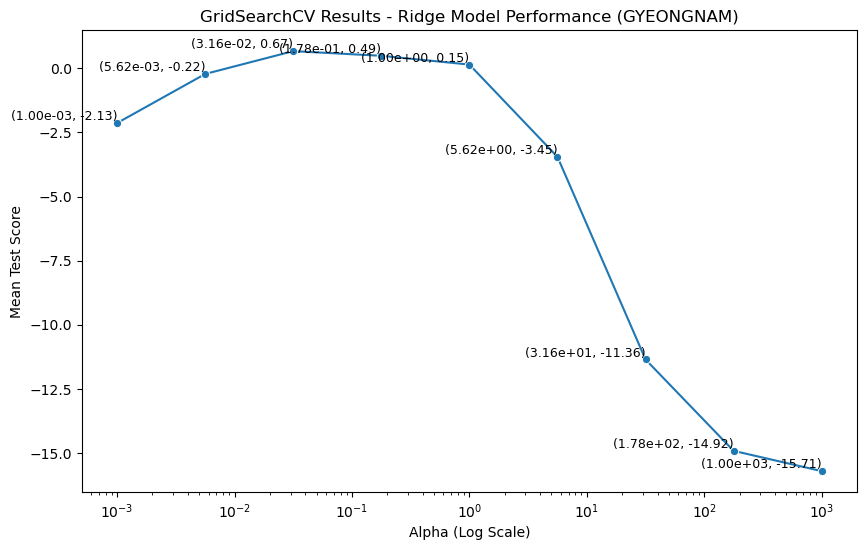


JEJU 데이터에 대한 학습 시작
      alpha  mean_test_score
0  0.001000         0.621307
1  0.005623         0.645141
2  0.031623         0.673994
3  0.177828         0.738836
4  1.000000         0.681380


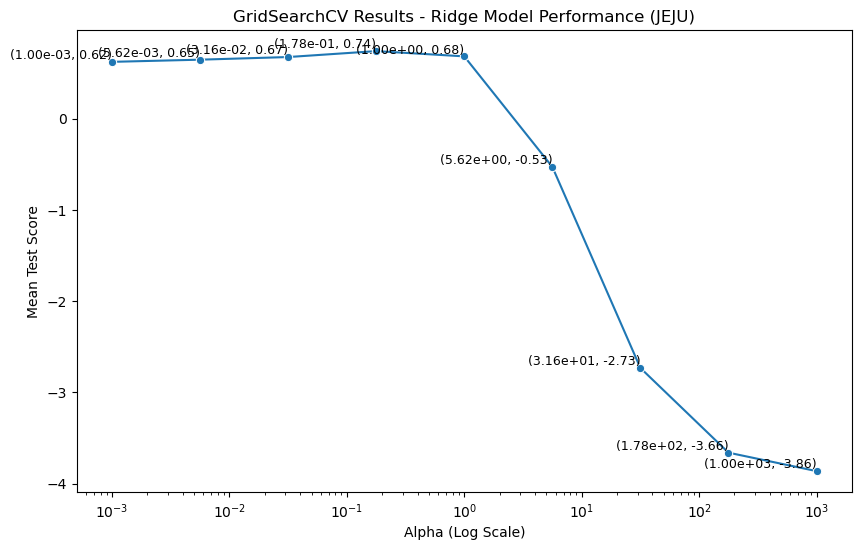

In [8]:
# 각 지역에 대해 학습 및 평가 진행
for area in features_dict.keys():
    print(f"\n{area} 데이터에 대한 학습 시작")

    # 해당 지역의 feature와 target을 가져오기
    X_area = features_dict[area]
    y_area = target_dict[area]

    # 데이터 스케일링
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_area)

    # 다항 특성 추가 (degree=2, 예시로 2차 다항식 추가)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    # train_test_split 80% : 20%
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_area, test_size=0.2, random_state=42)
    
    # Ridge 회귀 모델 + GridSearchCV
    ridge_model = Ridge()
    param_grid = {'alpha': np.logspace(-3, 3, 9)}  # alpha 하이퍼파라미터 튜닝
    grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # 최적 모델
    best_ridge_model = grid_search.best_estimator_

    # 예측
    y_train_pred = best_ridge_model.predict(X_train)
    y_test_pred = best_ridge_model.predict(X_test)

    # GridSearchCV 결과 확인
    results = grid_search.cv_results_

    # 결과에서 alpha 값과 해당 성능 추출
    alpha_values = results['param_alpha']
    mean_test_scores = results['mean_test_score']

    # alpha 값과 성능 점수를 데이터프레임으로 변환
    df = pd.DataFrame({
        'alpha': alpha_values,
        'mean_test_score': mean_test_scores
    })

    # 데이터프레임 확인 (디버깅용)
    print(df.head())

    # alpha와 mean_test_score 간의 관계 시각화 (라인 플롯)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='alpha', y='mean_test_score', marker='o')

    # 각 점의 좌표 출력
    for i in range(len(df)):
        plt.text(df['alpha'][i], df['mean_test_score'][i], f'({df["alpha"][i]:.2e}, {df["mean_test_score"][i]:.2f})',
                 fontsize=9, color='black', ha='right', va='bottom')

    # 로그 스케일로 x축 설정
    plt.xscale('log')

    # 그래프 제목 및 레이블 설정
    plt.title(f"GridSearchCV Results - Ridge Model Performance ({area})")
    plt.xlabel("Alpha (Log Scale)")
    plt.ylabel("Mean Test Score")

    # 그래프 표시
    plt.show()


SEOUL 데이터에 대한 학습 시작


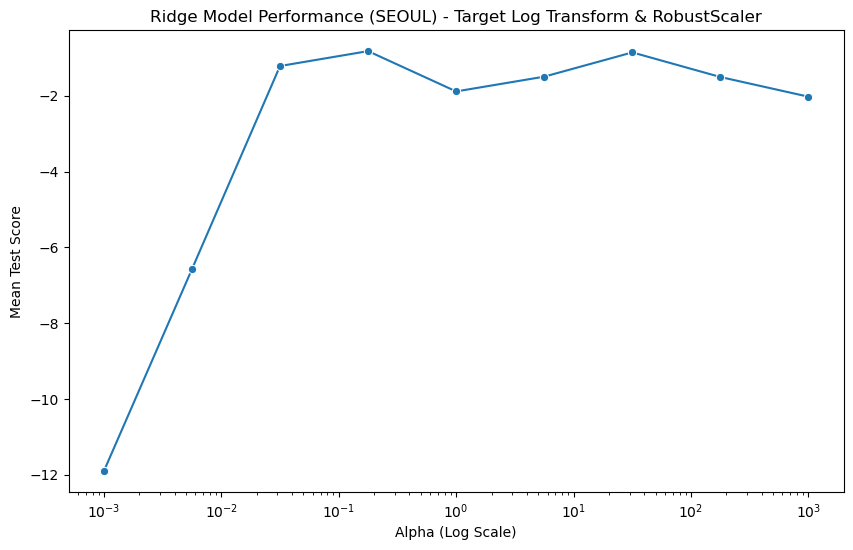


JEONNAM 데이터에 대한 학습 시작


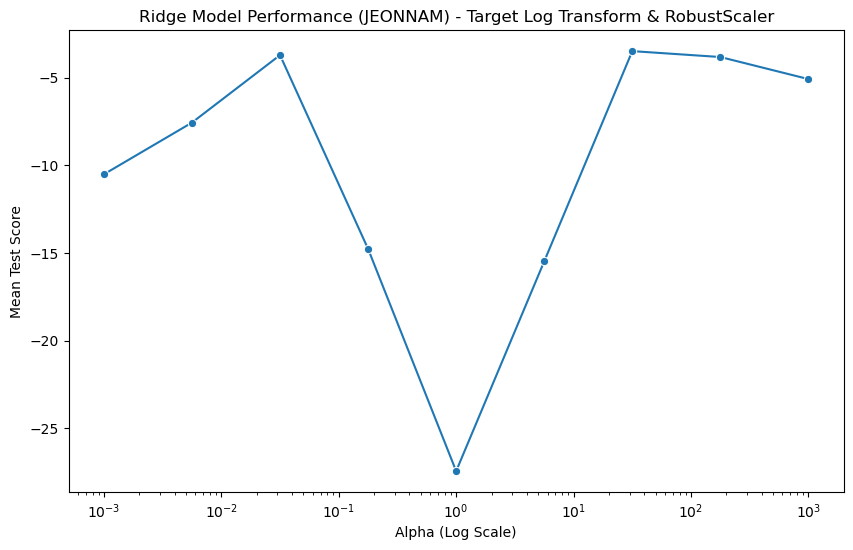

In [9]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler

# SEOUL과 JEONNAM 지역 데이터 변환 및 Ridge 학습
for area in ['SEOUL', 'JEONNAM']:
    print(f"\n{area} 데이터에 대한 학습 시작")

    # 데이터 준비
    X_area = features_dict[area]
    y_area = target_dict[area]

    # 데이터 스케일링 및 로그 변환
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_area)

    # 로그 변환된 타겟을 사용하는 Ridge 모델
    ridge_model = Ridge()
    transformer = TransformedTargetRegressor(regressor=ridge_model, func=np.log1p, inverse_func=np.expm1)

    # 다항 특성 추가 (degree=2로 고정)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_area, test_size=0.2, random_state=42)

    # GridSearchCV로 최적 alpha 탐색
    param_grid = {'regressor__alpha': np.logspace(-3, 3, 9)}
    grid_search = GridSearchCV(transformer, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # 최적 모델과 결과 시각화
    best_model = grid_search.best_estimator_
    results = grid_search.cv_results_

    # alpha와 mean_test_score 데이터프레임 생성
    df = pd.DataFrame({
        'alpha': results['param_regressor__alpha'].data,
        'mean_test_score': results['mean_test_score']
    })

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='alpha', y='mean_test_score', marker='o')

    # 로그 스케일 설정
    plt.xscale('log')

    # 그래프 제목 및 레이블
    plt.title(f"Ridge Model Performance ({area}) - Target Log Transform & RobustScaler")
    plt.xlabel("Alpha (Log Scale)")
    plt.ylabel("Mean Test Score")

    # 그래프 표시
    plt.show()



SEOUL 데이터 Regularization Path 분석 시작
Best alpha for SEOUL: 0.2009233002565048


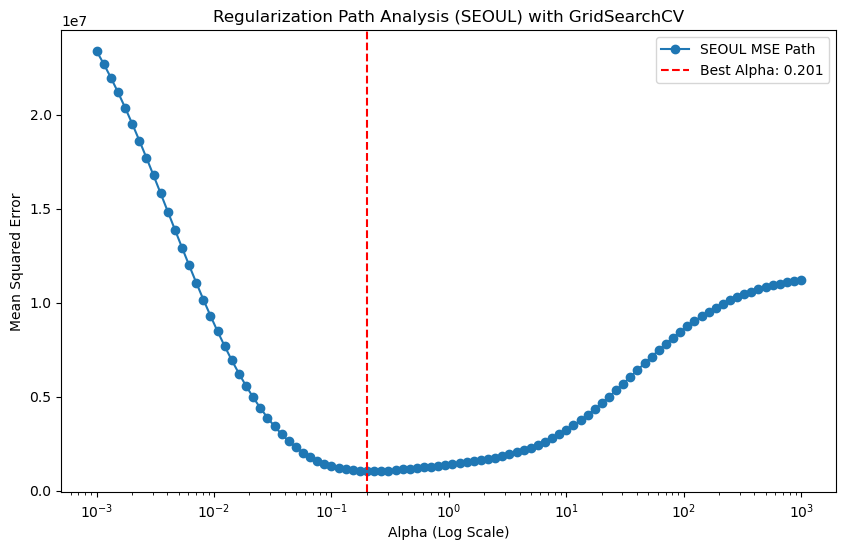


JEONNAM 데이터 Regularization Path 분석 시작
Best alpha for JEONNAM: 3.7649358067924674


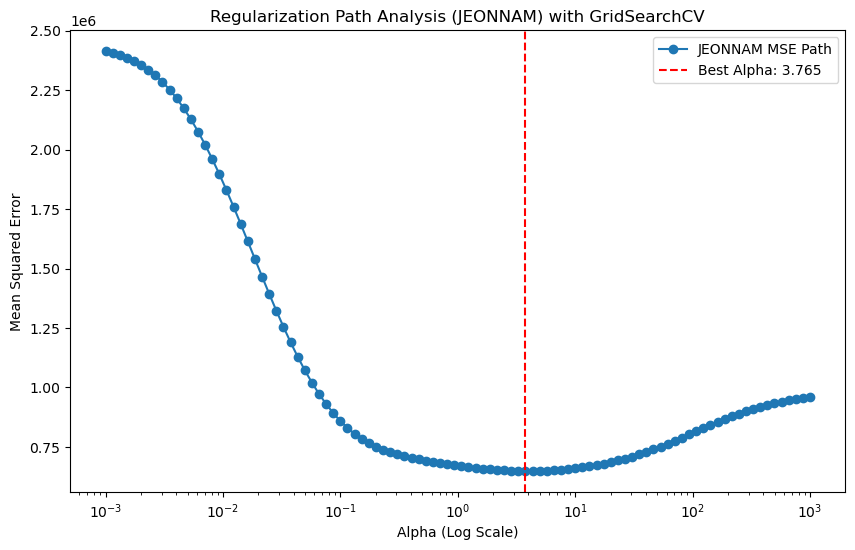

In [10]:
# Regularization Path Analysis with GridSearchCV
for area in ['SEOUL', 'JEONNAM']:
    print(f"\n{area} 데이터 Regularization Path 분석 시작")

    # Retrieve features and target for the area
    X_area = features_dict[area]
    y_area = target_dict[area]

    # Scale the features using StandardScaler                                                 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_area)

    # Add polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_area, test_size=0.2, random_state=42)

    # Ridge regression model with GridSearchCV
    alphas = np.logspace(-3, 3, 100)
    ridge_model = Ridge()
    param_grid = {'alpha': alphas}
    grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Best alpha
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha for {area}: {best_alpha}")

    # Extract results for each alpha
    mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Negate to get positive MSE

    # Visualization of the regularization path
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_test_scores, marker='o', label=f"{area} MSE Path")
    plt.axvline(best_alpha, linestyle='--', color='red', label=f"Best Alpha: {best_alpha:.3f}")

    # Set x-axis to logarithmic scale
    plt.xscale('log')
    plt.title(f"Regularization Path Analysis ({area}) with GridSearchCV")
    plt.xlabel("Alpha (Log Scale)")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()



SEOUL 데이터 Ridge Model Performance 분석 시작
Best alpha for SEOUL: 0.2009233002565048
SEOUL Train MSE: 245687.728, Test MSE: 13930724.089
SEOUL Train R2: 0.978, Test R2: 0.707


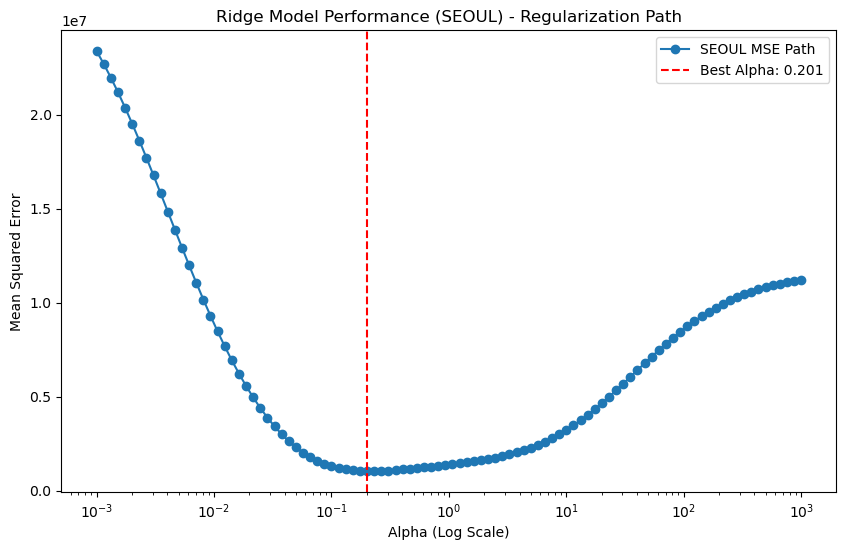


JEONNAM 데이터 Ridge Model Performance 분석 시작
Best alpha for JEONNAM: 3.7649358067924674
JEONNAM Train MSE: 68837.834, Test MSE: 1730587.079
JEONNAM Train R2: 0.932, Test R2: 0.575


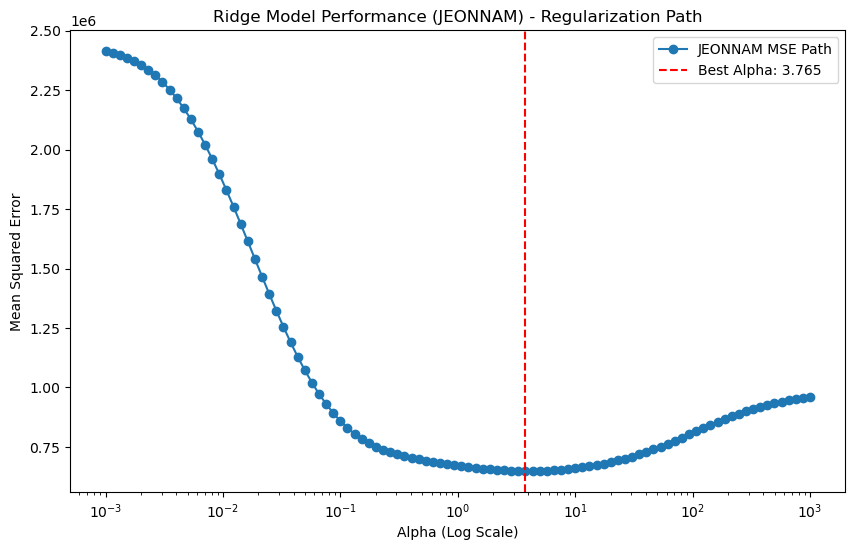

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Regularization Path Analysis for Ridge Model Performance (SEOUL and JEONNAM)
for area in ['SEOUL', 'JEONNAM']:
    print(f"\n{area} 데이터 Ridge Model Performance 분석 시작")

    # Retrieve features and target for the area
    X_area = features_dict[area]
    y_area = target_dict[area]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_area)

    # Add polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_area, test_size=0.2, random_state=42)

    # Ridge regression model with GridSearchCV
    alphas = np.logspace(-3, 3, 100)
    ridge_model = Ridge()
    param_grid = {'alpha': alphas}
    grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Best alpha
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha for {area}: {best_alpha}")

    # Extract results for each alpha
    mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Convert to positive MSE

    # Predict with the best model
    best_ridge_model = grid_search.best_estimator_
    y_train_pred = best_ridge_model.predict(X_train)
    y_test_pred = best_ridge_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{area} Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    print(f"{area} Train R2: {train_r2:.3f}, Test R2: {test_r2:.3f}")

    # Visualization of Ridge Model Performance
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_test_scores, marker='o', label=f"{area} MSE Path")
    plt.axvline(best_alpha, linestyle='--', color='red', label=f"Best Alpha: {best_alpha:.3f}")

    # Set x-axis to logarithmic scale
    plt.xscale('log')
    plt.title(f"Ridge Model Performance ({area}) - Regularization Path")
    plt.xlabel("Alpha (Log Scale)")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()